In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
qraw = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto74/paso_a_paso.csv')

In [42]:
qraw

,codigo_region,region_residencia,codigo_comuna,comuna_residencia,zona,2020-07-28,2020-07-29,2020-07-30,2020-07-31,2020-08-01,...,2021-04-24,2021-04-25,2021-04-26,2021-04-27,2021-04-28,2021-04-29,2021-04-30,2021-05-01,2021-05-02,2021-05-03
0,15,Arica y Parinacota,15101,Arica,Rural,3,3,3,3,3,...,2,2,2,2,2,1,1,1,1,1
1,15,Arica y Parinacota,15101,Arica,Urbana,1,1,1,1,1,...,2,2,2,2,2,1,1,1,1,1
2,15,Arica y Parinacota,15102,Camarones,Total,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
3,15,Arica y Parinacota,15202,General Lagos,Total,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,15,Arica y Parinacota,15201,Putre,Total,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,12,Magallanes,12101,Punta Arenas,Total,3,3,3,3,3,...,2,2,2,2,2,2,2,2,2,2
380,12,Magallanes,12103,Río Verde,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,4
381,12,Magallanes,12104,San Gregorio,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,4
382,12,Magallanes,12303,Timaukel,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,4


In [43]:
vals = list(qraw.columns)[5:-1]
ids = list(qraw.columns)[:5]

In [44]:
ids

['codigo_region',
 'region_residencia',
 'codigo_comuna',
 'comuna_residencia',
 'zona']

In [45]:
qdf = pd.melt(qraw, value_vars=vals, id_vars=ids)

In [46]:
qdf.head()

,codigo_region,region_residencia,codigo_comuna,comuna_residencia,zona,variable,value
0,15,Arica y Parinacota,15101,Arica,Rural,2020-07-28,3
1,15,Arica y Parinacota,15101,Arica,Urbana,2020-07-28,1
2,15,Arica y Parinacota,15102,Camarones,Total,2020-07-28,3
3,15,Arica y Parinacota,15202,General Lagos,Total,2020-07-28,3
4,15,Arica y Parinacota,15201,Putre,Total,2020-07-28,3


In [47]:
qraw['region_residencia'].value_counts()

Metropolitana         55
Valparaíso            38
Los Lagos             38
Araucanía             35
Biobío                35
Maule                 34
O’Higgins             33
Ñuble                 23
Aysén                 19
Coquimbo              15
Los Ríos              13
Magallanes            12
Antofagasta           12
Atacama                9
Tarapacá               8
Arica y Parinacota     5
Name: region_residencia, dtype: int64

In [48]:
qraw['comuna_residencia'].value_counts()

Aisén              4
Cochrane           3
Chonchi            2
Talca              2
Tocopilla          2
                  ..
Olivar             1
Calera de Tango    1
Lonquimay          1
Cerrillos          1
Coihueco           1
Name: comuna_residencia, Length: 346, dtype: int64

In [49]:
qdf.columns

Index(['codigo_region', 'region_residencia', 'codigo_comuna',
       'comuna_residencia', 'zona', 'variable', 'value'],
      dtype='object')

In [50]:
qdf.columns=['codigo_region', 'region_residencia', 'codigo_comuna',
       'comuna_residencia', 'zona', 'fecha', 'fase']

In [51]:
qdf

,codigo_region,region_residencia,codigo_comuna,comuna_residencia,zona,fecha,fase
0,15,Arica y Parinacota,15101,Arica,Rural,2020-07-28,3
1,15,Arica y Parinacota,15101,Arica,Urbana,2020-07-28,1
2,15,Arica y Parinacota,15102,Camarones,Total,2020-07-28,3
3,15,Arica y Parinacota,15202,General Lagos,Total,2020-07-28,3
4,15,Arica y Parinacota,15201,Putre,Total,2020-07-28,3
...,...,...,...,...,...,...,...
107131,12,Magallanes,12101,Punta Arenas,Total,2021-05-02,2
107132,12,Magallanes,12103,Río Verde,Total,2021-05-02,4
107133,12,Magallanes,12104,San Gregorio,Total,2021-05-02,4
107134,12,Magallanes,12303,Timaukel,Total,2021-05-02,4


In [52]:
qdf['fecha']=pd.to_datetime(qdf['fecha'])

In [53]:
qdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107136 entries, 0 to 107135
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   codigo_region      107136 non-null  int64         
 1   region_residencia  107136 non-null  object        
 2   codigo_comuna      107136 non-null  int64         
 3   comuna_residencia  107136 non-null  object        
 4   zona               107136 non-null  object        
 5   fecha              107136 non-null  datetime64[ns]
 6   fase               107136 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 5.7+ MB


In [54]:
def get_fases(comuna, fecha, show=True):
    res=qdf[(qdf['comuna_residencia']==comuna) & 
           (qdf['fecha']>=fecha[0]) &
            (qdf['fecha']<=fecha[1])]
    return res

In [55]:
get_fases('Las Condes',('2021-03-20', '2021-03-28'))

,codigo_region,region_residencia,codigo_comuna,comuna_residencia,zona,fecha,fase
90348,13,Metropolitana,13114,Las Condes,Total,2021-03-20,2
90732,13,Metropolitana,13114,Las Condes,Total,2021-03-21,2
91116,13,Metropolitana,13114,Las Condes,Total,2021-03-22,2
91500,13,Metropolitana,13114,Las Condes,Total,2021-03-23,2
91884,13,Metropolitana,13114,Las Condes,Total,2021-03-24,2
92268,13,Metropolitana,13114,Las Condes,Total,2021-03-25,2
92652,13,Metropolitana,13114,Las Condes,Total,2021-03-26,2
93036,13,Metropolitana,13114,Las Condes,Total,2021-03-27,1
93420,13,Metropolitana,13114,Las Condes,Total,2021-03-28,1


In [56]:
fases = get_fases('Las Condes',('2021-03-20', '2021-03-28'))

In [57]:
def get_fases(comuna, fecha, show=True):
    res=qdf[(qdf['comuna_residencia']==comuna) & 
           (qdf['fecha']>=fecha[0]) &
            (qdf['fecha']<=fecha[1])]
    res.plot(x='fecha', y='fase')
    plt.yticks([1,2,3,4])
    plt.title(f'fases para: {comuna}')
    return res

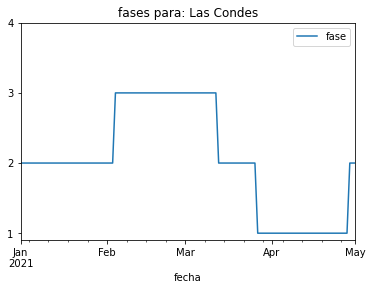

In [58]:
fases = get_fases('Las Condes',('2021-01-01', '2021-05-01'))